In [24]:
import pandas as pd
import numpy as np

#sklearn related
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Model Evaluation related
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score

#plotting related
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv('salespeople.csv')
df.head()

,promoted,sales,customer_rate,performance
0,0,594.0,3.94,2.0
1,0,446.0,4.06,3.0
2,1,674.0,3.83,4.0
3,0,525.0,3.62,2.0
4,1,657.0,4.40,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   promoted       351 non-null    int64  
 1   sales          350 non-null    float64
 2   customer_rate  350 non-null    float64
 3   performance    350 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 11.1 KB


In [4]:
df.tail()

,promoted,sales,customer_rate,performance
346,0,586.0,3.41,2.0
347,0,401.0,1.60,3.0
348,0,500.0,4.17,2.0
349,0,373.0,2.54,1.0
350,0,NaN,NaN,NaN


In [5]:
df.dropna(inplace=True)
df.tail()

,promoted,sales,customer_rate,performance
345,0,459.0,2.82,3.0
346,0,586.0,3.41,2.0
347,0,401.0,1.60,3.0
348,0,500.0,4.17,2.0
349,0,373.0,2.54,1.0


In [6]:
df['promoted'].value_counts()

0    237
1    113
Name: promoted, dtype: int64

In [7]:
df.corr()

,promoted,sales,customer_rate,performance
promoted,1.000000,0.851128,0.181018,0.266254
sales,0.851128,1.000000,0.337805,0.279660
customer_rate,0.181018,0.337805,1.000000,0.058864
performance,0.266254,0.279660,0.058864,1.000000


/home/aboli/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promoted', ylabel='count'>

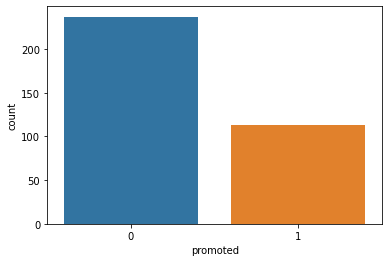

In [8]:
sns.countplot(df['promoted'])

In [9]:
df.drop(['customer_rate','performance'],axis=1,inplace=True)
df.head()

,promoted,sales
0,0,594.0
1,0,446.0
2,1,674.0
3,0,525.0
4,1,657.0


In [10]:
x = df.drop('promoted')
y = df['promoted']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

logmodel = LogisticRegression()

logmodel.fit(x_train,y_train)

logmodel.score(x_test,y_test)

1.0

In [11]:
y_pred = logmodel.predict(x_test)
y_pred[:5]

array([1, 0, 1, 0, 0])

In [12]:
y_test[:5]

111    1
31     0
105    1
71     0
273    0
Name: promoted, dtype: int64

In [13]:
y_pred1 = logmodel.predict_proba(x_test)
y_pred1[:5]

array([[1.22251111e-01, 8.77748889e-01],
       [9.70611117e-01, 2.93888826e-02],
       [3.76577659e-01, 6.23422341e-01],
       [9.99884478e-01, 1.15521609e-04],
       [9.96768041e-01, 3.23195895e-03]])

In [14]:
x_test

,sales
111,651.0
31,487.0
105,607.0
71,320.0
273,420.0
...,...
271,540.0
318,544.0
56,840.0
241,357.0


In [15]:
df_test = pd.DataFrame({'sales':[200,700,500,250,900]})
df_test

,sales
0,200
1,700
2,500
3,250
4,900


In [16]:
y_dummy = logmodel.predict(df_test)
y_dummy[:5]

array([0, 1, 0, 0, 1])

In [17]:
confusion_matrix(y_test,y_pred)

array([[45,  0],
       [ 0, 25]])

In [18]:
tn,fp,fn,tp=46,0,4,20


In [19]:
accuracy_score(y_test,y_pred)

1.0

In [20]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        25

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



In [22]:
y_pred_prob = logmodel.predict_proba(x_test)
y_pred_prob

array([[1.22251111e-01, 8.77748889e-01],
       [9.70611117e-01, 2.93888826e-02],
       [3.76577659e-01, 6.23422341e-01],
       [9.99884478e-01, 1.15521609e-04],
       [9.96768041e-01, 3.23195895e-03],
       [9.99725138e-01, 2.74862302e-04],
       [9.88237094e-01, 1.17629061e-02],
       [9.99408365e-01, 5.91635143e-04],
       [9.97170467e-01, 2.82953328e-03],
       [3.21357823e-02, 9.67864218e-01],
       [3.22842791e-05, 9.99967716e-01],
       [9.99056714e-01, 9.43285790e-04],
       [4.04644628e-03, 9.95953554e-01],
       [7.95747274e-06, 9.99992043e-01],
       [9.98922267e-01, 1.07773299e-03],
       [1.00495203e-05, 9.99989950e-01],
       [9.97758186e-01, 2.24181420e-03],
       [4.87238538e-02, 9.51276146e-01],
       [1.02352584e-01, 8.97647416e-01],
       [9.71994693e-06, 9.99990280e-01],
       [9.92343069e-01, 7.65693109e-03],
       [9.99956073e-01, 4.39266828e-05],
       [9.97522909e-01, 2.47709090e-03],
       [8.93800314e-01, 1.06199686e-01],
       [9.715475

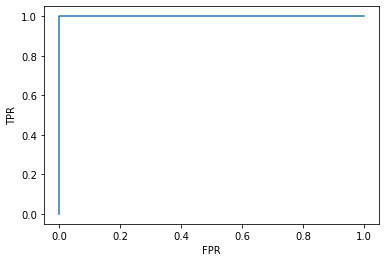

In [23]:
fpr,tpr,thresh=roc_curve(y_test,y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('ROC.png')

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

knn.score(x_test,y_test)

0.9857142857142858